Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.
Epoch 1/30
100/100 [==============================] - 433s 4s/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
100/100 [==============================] - 351s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
100/100 [==============================] - 198s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
100/100 [==============================] - 141s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
100/100 [==============================] - 122s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
100/100 [================

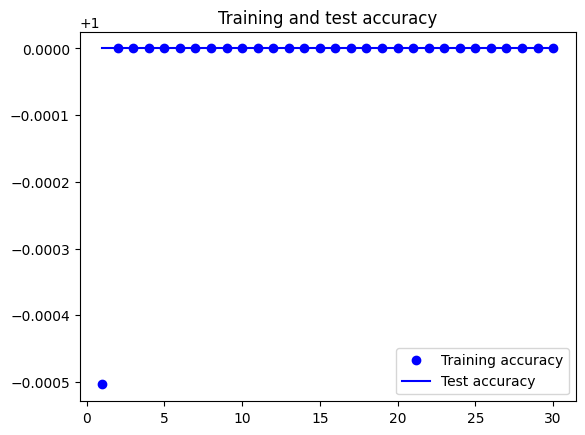

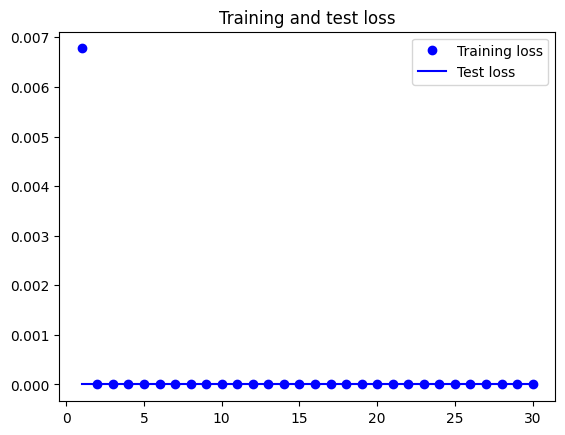

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths to the dataset
train_dir = '/content/drive/MyDrive/bharath intern project/dataset dog and cat/training_set'
test_dir = '/content/drive/MyDrive/bharath intern project/dataset dog and cat/test_set'

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=20,
        class_mode='binary')

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=test_generator,
      validation_steps=50)

# Plot training and test accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()


In [2]:
# After training the model

# Save the model
model.save('/content/drive/MyDrive/dog_cat_model.h5')
print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [4]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/dog_cat_model.h5'
model = tf.keras.models.load_model(model_path)

# Load and preprocess the image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Make prediction
    prediction = model.predict(img_array)
    if prediction[0] >= 0.5:
        print(f"{filename} is a dog.")
    else:
        print(f"{filename} is a cat.")


Saving dataset-card.jpg to dataset-card.jpg
1/1 [==============================] - 0s 102ms/step
dataset-card.jpg is a cat.
